# Problem Statement:
**Use Random Forest to prepare a model on fraud data  
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [146]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [147]:
#Load data
data = pd.read_csv("Fraud_check.csv",encoding='latin1', error_bad_lines = False)
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


**EDA and Data preprocessing**

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [149]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


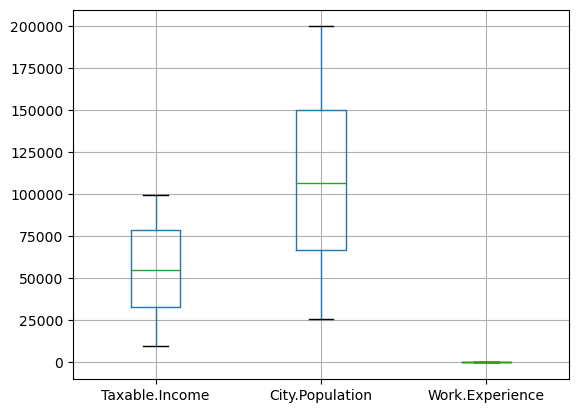

In [150]:
data.boxplot()
plt.show()

<Figure size 500x500 with 0 Axes>

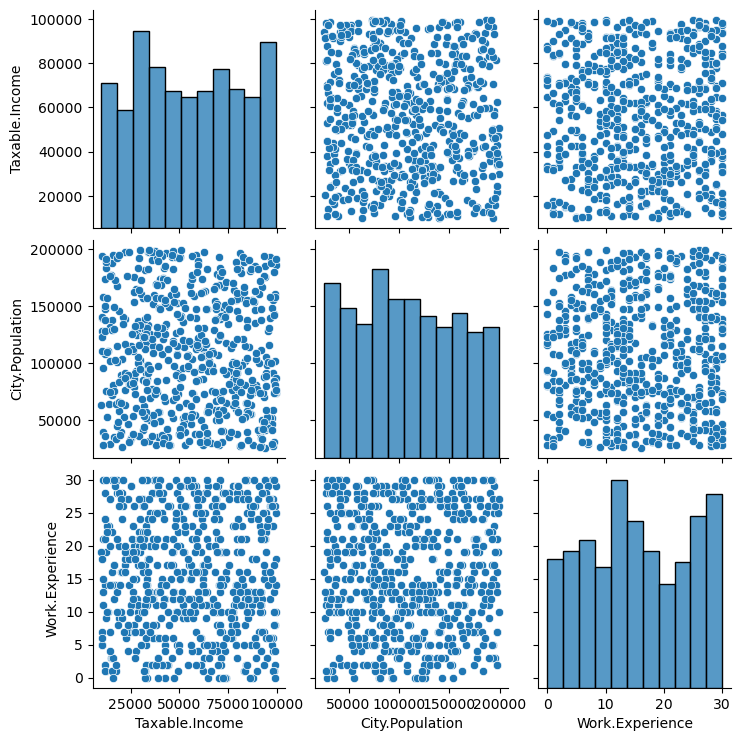

In [151]:
plt.figure(figsize= (5,5))
sns.pairplot(data)
plt.show()

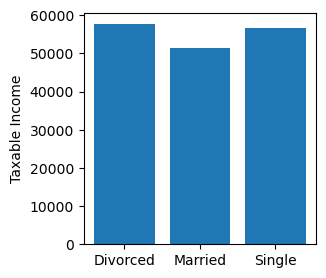

In [152]:
plt.figure(figsize= (3,3))
df1 = data.groupby("Marital.Status").mean().reset_index()
plt.bar(df1["Marital.Status"], df1["Taxable.Income"])
plt.ylabel("Taxable Income")
plt.show()

In [153]:
# renaming the columns
data.columns = ["undergrad","maritul_status","taxable_income","city_population", "work_experience","urban"]
data.head(1)

,undergrad,maritul_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES


In [154]:
# converting sales from continous to catagorical varible
fraud_check = []
for income in data["taxable_income"]:
    if income<=30000:
         fraud_check.append("Risky")
    else:
        fraud_check.append("Good")
data["fraud_check"] = fraud_check

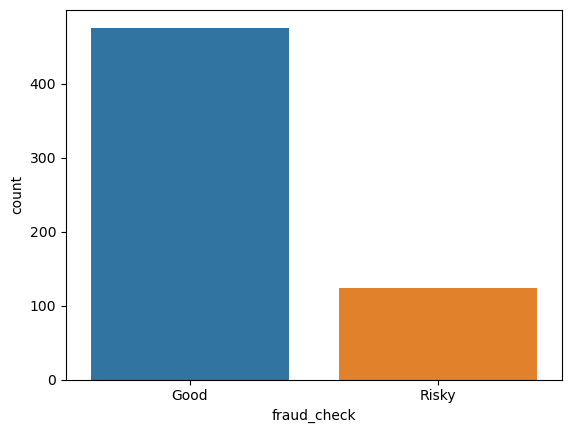

In [155]:
data.fraud_check.value_counts()
sns.countplot(data.fraud_check)
plt.show()

In [156]:
X = data.drop(["taxable_income", "fraud_check"], axis = 1)
Y = data["fraud_check"]

In [157]:
le = preprocessing.LabelEncoder()
Y_label = le.fit_transform(Y)


In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in X.columns:
    if X[col].dtype in ["int64", "float64"]:
        X[col] = scaler.fit_transform(X[[col]])

In [159]:
X_new = pd.get_dummies(X)
X_new.head()

,city_population,work_experience,undergrad_NO,undergrad_YES,maritul_status_Divorced,maritul_status_Married,maritul_status_Single,urban_NO,urban_YES
0,-1.178521,-0.629143,1,0,0,0,1,0,1
1,0.508500,0.276370,0,1,1,0,0,0,1
2,1.033109,1.634639,1,0,0,1,0,0,1
3,1.696831,-0.063197,0,1,0,0,1,0,1
4,-1.630532,1.408261,1,0,0,1,0,1,0


In [160]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y_label, train_size=0.8, random_state = 42)

# **Model Building**

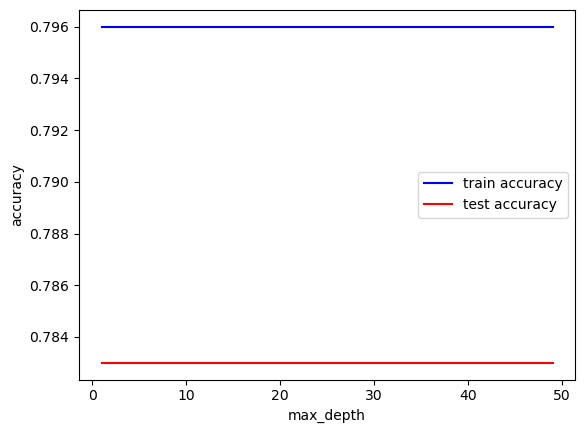

In [161]:
# Randomm Forest Classifier
from sklearn.ensemble import RandomForestClassifier
max_depth = list(range(1,50))
train_acc = []
test_acc = []
for dp in max_depth:
    model = RandomForestClassifier(bootstrap = True, n_estimators=100,max_depth=dp,
                                    min_samples_leaf=7,random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_acc.append(round(model.score(x_train, y_train),3))
    test_acc.append(round(model.score(x_test, y_test),3))

plt.plot(max_depth,train_acc, color = "blue",label = "train accuracy" ) 
plt.plot(max_depth,test_acc, color = "red", label = "test accuracy") 
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [162]:
#Predicting on test data
model1 = RandomForestClassifier(bootstrap = True, n_estimators=100,max_depth=5,
                                    min_samples_leaf=5,random_state=42)
model1.fit(x_train, y_train)
preds = model1.predict(x_test) # predicting on test data set 
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

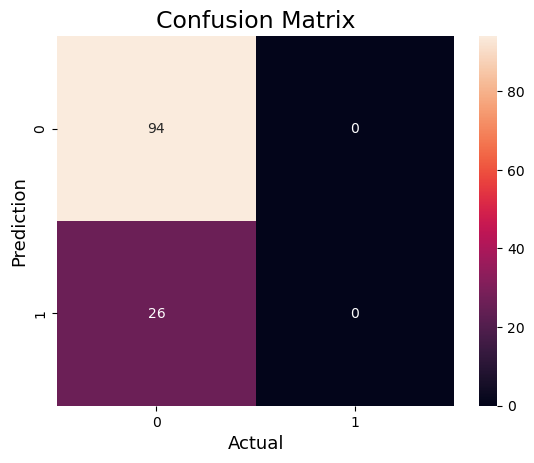

In [163]:
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

AUC: 0.500


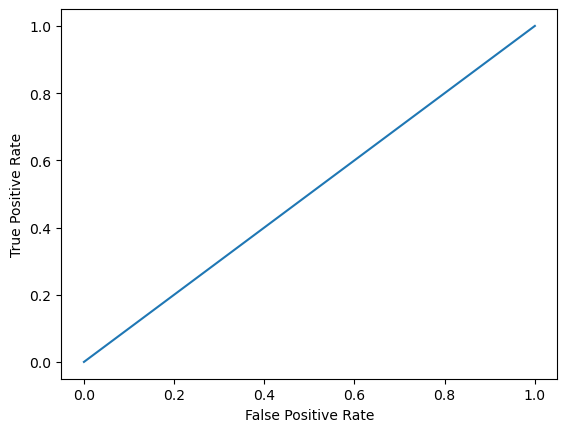

In [164]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc = roc_auc_score(y_test, preds)
print('AUC: %.3f' % auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [165]:
#Gridsearch
param_grid = { 
           'n_estimators' : [ 50,100, 150],
           'max_depth' : [ 5,7,9],
           'min_samples_leaf' : [ 5, 10],
           'criterion':['gini','entropy']
           }
Estimator = RandomForestClassifier(bootstrap = True, random_state = 42)
CV_rfc1 = GridSearchCV(estimator= Estimator, param_grid=param_grid, cv= 3)
CV_rfc1.fit(x_train, y_train)
y_pred1 = CV_rfc1.predict(x_test)
print(CV_rfc1.score(x_test, y_test))
print (CV_rfc1.best_params_)

0.7833333333333333
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}


AUC: 0.500


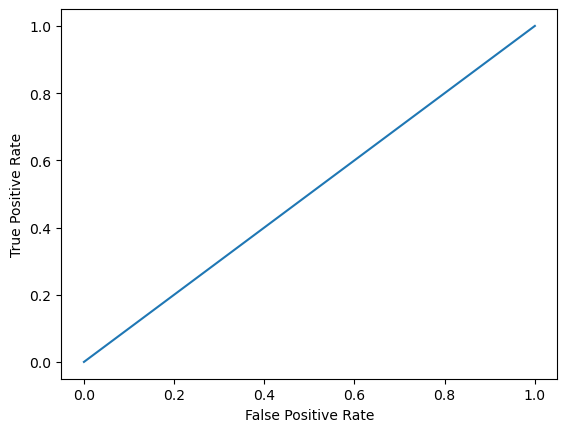

In [166]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
auc = roc_auc_score(y_test, y_pred1)
print('AUC: %.3f' % auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [167]:
from sklearn.ensemble import AdaBoostClassifier
Estimator = RandomForestClassifier(random_state = 42)
ABC = AdaBoostClassifier(n_estimators=50, 
                   learning_rate=0.5, algorithm='SAMME.R', random_state=42, base_estimator= Estimator)
ABC.fit(x_train, y_train)
y_pred_ABC = ABC.predict(x_test)
print(ABC.score(x_test, y_test))

0.7416666666666667


AUC: 0.473


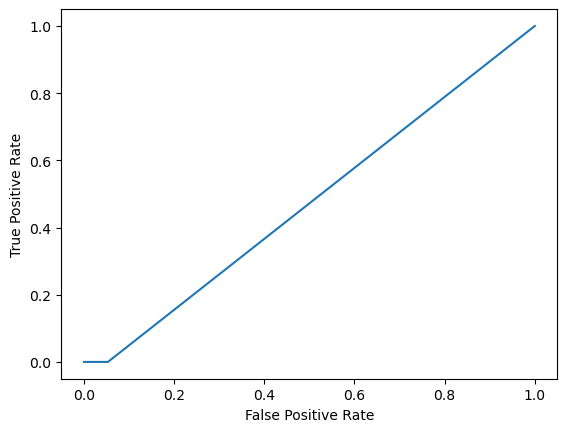

In [168]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ABC)
auc = roc_auc_score(y_test, y_pred_ABC)
print('AUC: %.3f' % auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**None of the model is predcting the unsafe events labelled as one due to their low frequency and the preditions are as good as a random chance.This is because of the imbalane data.
Therefroe first perform random oversampling and then find the feature importance.**

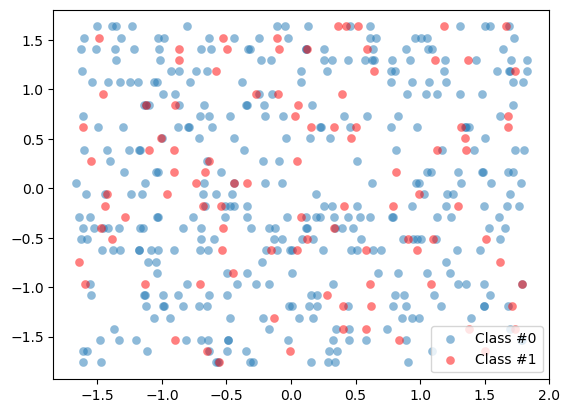

In [169]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()
plot_data(x_train.values, y_train)

In [170]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
method = RandomOverSampler(random_state=42, sampling_strategy= 'minority')
x_resampled, y_resampled =  method.fit_resample(x_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_resampled))

Original dataset shape Counter({0: 382, 1: 98})
Resampled dataset shape Counter({0: 382, 1: 382})


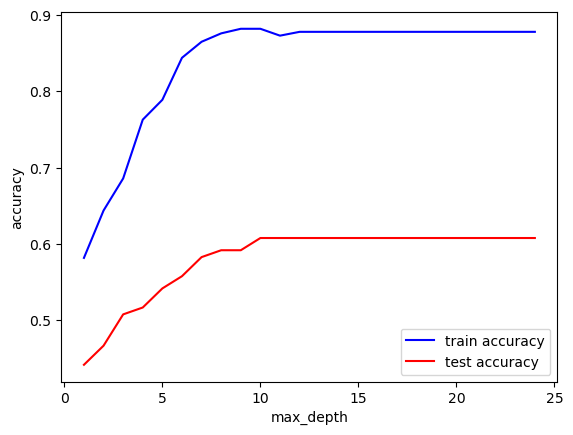

In [171]:
# Randomm Forest Classifier
from sklearn.ensemble import RandomForestClassifier
max_depth = list(range(1,25))
train_acc = []
test_acc = []
for dp in max_depth:
    model = RandomForestClassifier(bootstrap = True, n_estimators=100,max_depth=dp,
                                    min_samples_leaf=7,random_state=42)
    model.fit(x_resampled, y_resampled)
    y_pred = model.predict(x_test)
    train_acc.append(round(model.score(x_resampled, y_resampled),3))
    test_acc.append(round(model.score(x_test, y_test),3))

plt.plot(max_depth,train_acc, color = "blue",label = "train accuracy" ) 
plt.plot(max_depth,test_acc, color = "red", label = "test accuracy") 
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [172]:
#Gridsearch for the resampled data
param_grid1 = { 
           'n_estimators' : [50,100,200],
           'max_depth' : [10],
           'criterion':['gini','entropy']
           }
Estimator = RandomForestClassifier(random_state = 42)
CV_rfc2 = GridSearchCV(estimator= Estimator, param_grid=param_grid1, cv= 3)
CV_rfc2.fit(x_resampled, y_resampled)
y_pred2 = CV_rfc2.predict(x_test)
print(CV_rfc2.score(x_test, y_test))
print(CV_rfc2.score(x_resampled, y_resampled))
print (CV_rfc2.best_params_)

0.6583333333333333
0.9882198952879581
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}


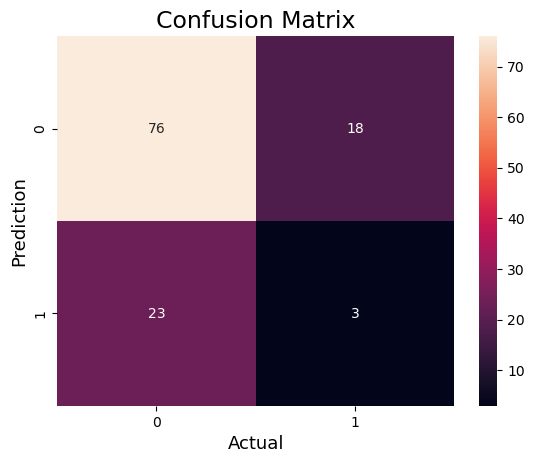

In [173]:
cm2 = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm2,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

AUC: 0.500


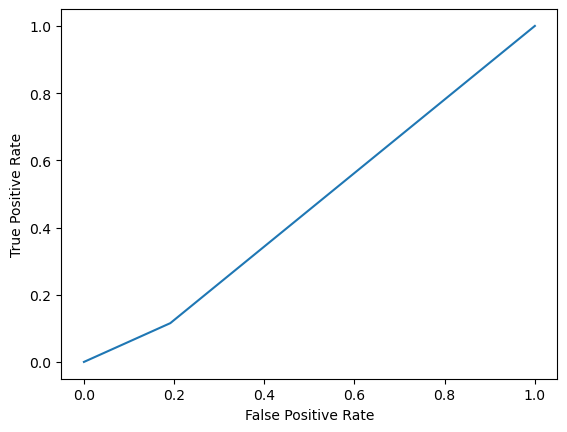

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
auc = roc_auc_score(y_test, y_pred1)
print('AUC: %.3f' % auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**feature engineering and feature selection : data with less importance for the random forest classifier were removed and random oversampling was performed**

In [175]:
imp = list(CV_rfc2.best_estimator_.feature_importances_)
col_names = list(X_new.columns)
imp_df = pd.DataFrame(imp, col_names).reset_index()
imp_df.columns = ["feature", "importance"]
df_imp = imp_df.sort_values("importance", ascending=True)

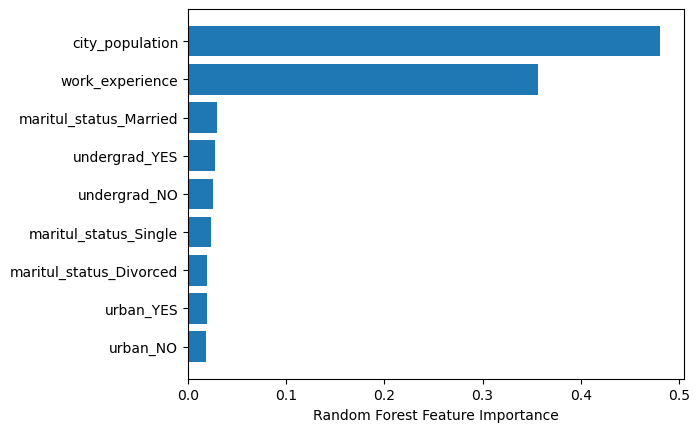

In [176]:
plt.barh(df_imp.feature, df_imp.importance)
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [177]:
data.loc[data.maritul_status.isin(["Divorced", "Single"]), "status"] = "single"
data.loc[data.maritul_status.isin(["Married"]), "status"] = "single"
df = data.drop(["maritul_status", "urban", "taxable_income","undergrad"], axis =1)
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = scaler.fit_transform(df[[col]])
df

,city_population,work_experience,fraud_check,status
0,-1.178521,-0.629143,Good,single
1,0.508500,0.276370,Good,single
2,1.033109,1.634639,Good,single
3,1.696831,-0.063197,Good,single
4,-1.630532,1.408261,Good,single
...,...,...,...,...
595,-1.390432,-0.968710,Good,single
596,-1.071672,-1.534655,Good,single
597,0.909696,-1.761033,Good,single
598,1.432197,0.163181,Good,single


In [178]:
in_var = df.drop("fraud_check", axis = 1)
target = df.fraud_check

In [179]:
X2 = pd.get_dummies(in_var)
Y2 = le.fit_transform(target)

In [180]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y2,train_size=0.8, random_state = 42 )

In [181]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
method = RandomOverSampler(random_state=42, sampling_strategy= 'minority')
x_resampled, y_resampled =  method.fit_resample(x_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_resampled))

Original dataset shape Counter({0: 382, 1: 98})
Resampled dataset shape Counter({0: 382, 1: 382})


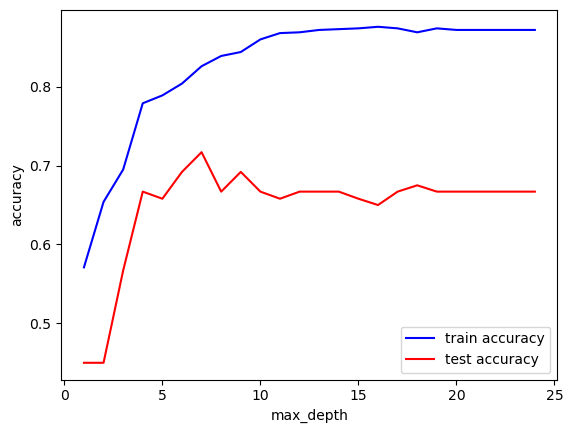

In [182]:
# Randomm Forest Classifier
from sklearn.ensemble import RandomForestClassifier
max_depth = list(range(1,25))
train_acc = []
test_acc = []
for dp in max_depth:
    model = RandomForestClassifier(bootstrap = True, n_estimators=100,max_depth=dp,
                                    min_samples_leaf=5,random_state=42)
    model.fit(x_resampled, y_resampled)
    y_pred = model.predict(x_test)
    train_acc.append(round(model.score(x_resampled, y_resampled),3))
    test_acc.append(round(model.score(x_test, y_test),3))

plt.plot(max_depth,train_acc, color = "blue",label = "train accuracy" ) 
plt.plot(max_depth,test_acc, color = "red", label = "test accuracy") 
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [183]:
#Predicting on test data with max_depth 7
model2 = RandomForestClassifier(bootstrap = True, n_estimators=100,max_depth=7,
                                    min_samples_leaf=5,random_state=42)
model2.fit(x_resampled, y_resampled)
preds2 = model2.predict(x_test) # predicting on test data set 
preds2

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

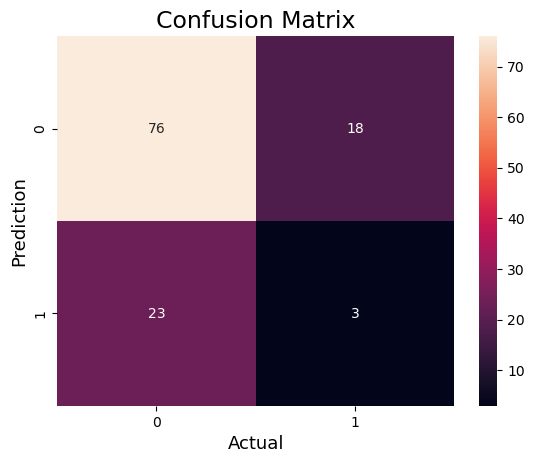

In [184]:
cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

AUC: 0.462


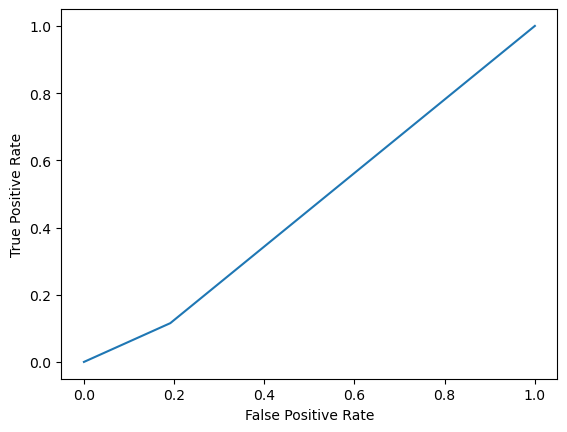

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
auc = roc_auc_score(y_test, y_pred2)
print('AUC: %.3f' % auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [186]:
#Gridsearch for tuning hyperparameters
param_grid = { 
           'n_estimators' : [100,150,200],
           'max_depth' : [7],
           'min_samples_leaf' : [ 5, 7],
           'criterion':['gini','entropy']
           }
Estimator = RandomForestClassifier(bootstrap = True, random_state = 42)
CV_rfc2 = GridSearchCV(estimator= Estimator, param_grid=param_grid, cv = 3)
CV_rfc2.fit(x_resampled, y_resampled)
y_rcf = CV_rfc2.predict(x_test)
print(CV_rfc2.score(x_resampled, y_resampled))
print(CV_rfc2.score(x_test, y_test))
print (CV_rfc2.best_params_)

0.837696335078534
0.7083333333333334
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 150}


In [187]:
model3  = RandomForestClassifier(bootstrap = True, n_estimators=150, max_depth=7,
                                    min_samples_leaf=5, random_state=42)
model3.fit(x_resampled, y_resampled)
y_pred3 = model3.predict(x_test)

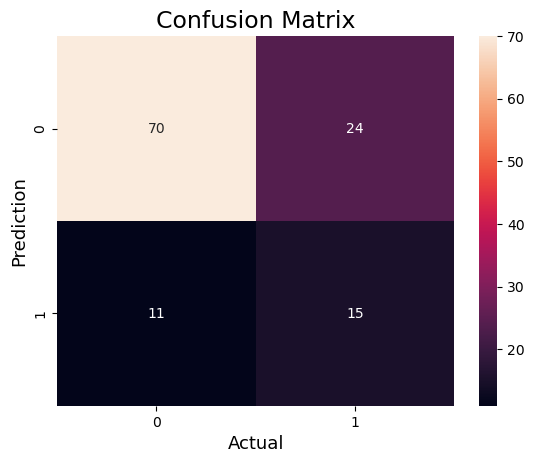

In [188]:
cm3 = confusion_matrix(y_test,y_pred3)
sns.heatmap(cm3,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

AUC: 0.661


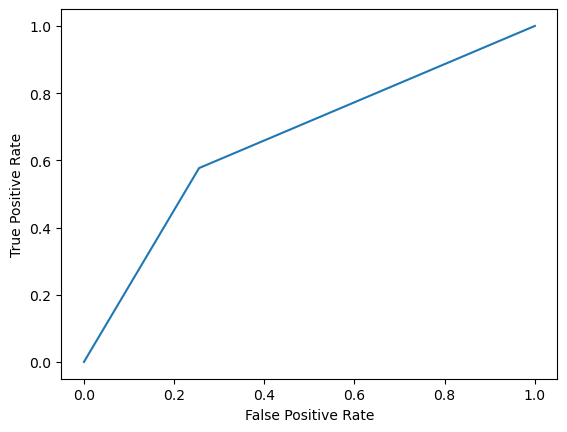

In [189]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
auc = roc_auc_score(y_test, y_pred3)
print('AUC: %.3f' % auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [190]:
Estimator = RandomForestClassifier(random_state = 42)
ABC1= AdaBoostClassifier(n_estimators=50, 
                   learning_rate=0.5, algorithm='SAMME.R', random_state=42, base_estimator= Estimator)
ABC1.fit(x_resampled, y_resampled)
y_pred_ABC1 = ABC1.predict(x_test)
print(ABC1.score(x_test, y_test))

0.65


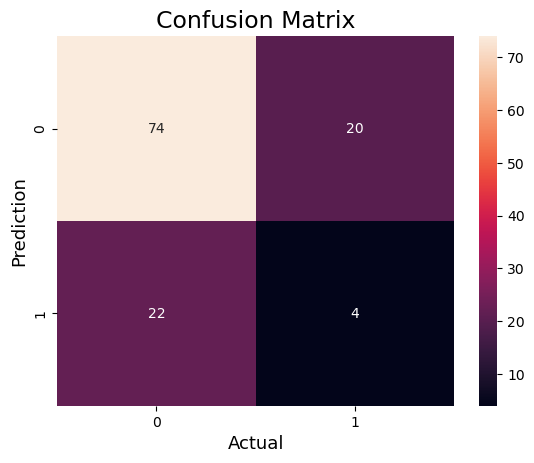

In [191]:
cm4 = confusion_matrix(y_test,y_pred_ABC1)
sns.heatmap(cm4,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

AUC: 0.471


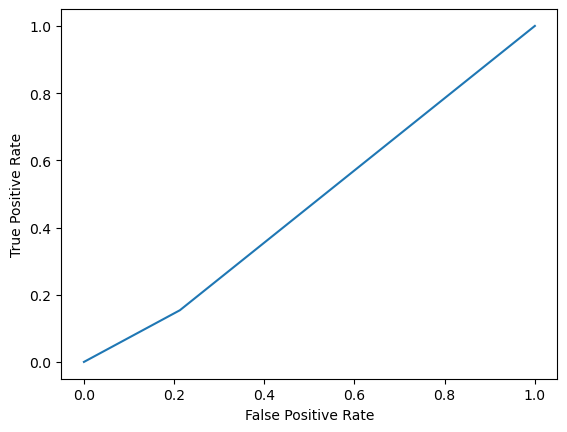

In [192]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ABC1)
auc = roc_auc_score(y_test, y_pred_ABC1)
print('AUC: %.3f' % auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion :
    The final model parameters after fearture selection, feature engineering and oversampling the minority class using the randomoversampler is
    model3  = RandomForestClassifier(bootstrap = True, n_estimators=150, max_depth=7,
                                    min_samples_leaf=5, random_state=42)
    with AUC = 0.661 